In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Import packages to be used
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/drive/Team Drives/Tensors/listings_data_cleaned.csv')
#check out the rows and columns
df.shape

(13936, 48)

## Normalization

### How to Qualify for Airbnb Superhost Status
The four criteria that hosts must meet to become an Airbnb Superhost are:

1) Host a minimum of 10 stays in a year

2) Respond to guests quickly and maintain a 90% response rate or higher

3) Have at least 80% 5-star reviews


### So, we are using features such as : number of reviews, response rate, reviews score accuracy to create our Superhost columns as latent variable to figure out whether will it affects our model's accuracy.
First, we will normalizaing our 3 main features as they are not balance enough. Then, multiply by their own coeficient to create its own equations and added into a column as latent variable. 

In [0]:
from sklearn import preprocessing

df['host_response_rate1_normal'] = preprocessing.normalize(df[['host_response_rate1']])
df['review_scores_accuracy_normal'] = preprocessing.normalize(df[['review_scores_accuracy']])
df['number_of_reviews_normal'] = preprocessing.normalize(df[['number_of_reviews']])

In [0]:
df['Superhost1'] = df['host_response_rate1'] * df['host_response_rate1_normal']
df['Superhost2'] =df['review_scores_accuracy'] *df['host_response_rate1_normal']
df['Superhost3'] =df['number_of_reviews'] * df['number_of_reviews_normal']
df['Superhost_final'] = df['Superhost1'] + df['Superhost2'] +df['Superhost3']

## Decision Tree Regression

### Price VS Bedrooms

In [7]:
#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

x =df[['bedrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

dtree1_bedrooms = DecisionTreeRegressor()
dtree1_bedrooms.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree1_bedrooms.score(X_test, y_test)

0.500967013501187

### Price VS Beds

In [0]:
x =df[['beds']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

dtree2_beds = DecisionTreeRegressor()
dtree2_beds.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree2_beds.score(X_test, y_test)

0.40175415061580044

### Price VS Bathrooms

In [0]:
x =df[['bathrooms']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

dtree3_bathrooms = DecisionTreeRegressor()
dtree3_bathrooms.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree3_bathrooms.score(X_test, y_test)

0.3180556643017983

### Price VS Accommodates

In [0]:
x =df[['accommodates']]
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

dtree4_accomondates = DecisionTreeRegressor()
dtree4_accomondates.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree4_accomondates.score(X_test, y_test)

0.4996291765047532

## Price VS all 4 main features - Superhost variable

In [0]:
x =df[['bedrooms','beds','bathrooms','accommodates']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.25, random_state=1)

dtree5= DecisionTreeRegressor()
dtree5.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree5.score(X_test, y_test)

0.6337992978000506

### Price VS all 4 main features + Superhost variable

*   List item
*   List item



In [0]:
x =df[['bedrooms','beds','bathrooms','accommodates','Superhost_final']]
y = df['price']

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.25, random_state=1)

dtree6 = DecisionTreeRegressor()
dtree6.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
dtree6.score(X_test, y_test)

0.7787385393877845

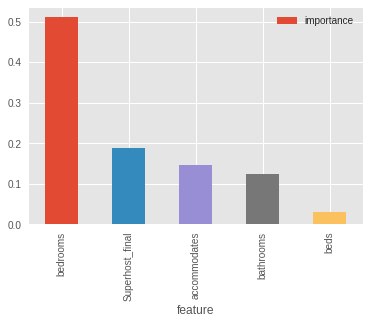

In [0]:
importances = dtree6.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar')


#### As we can see, Decision Tree with 4 features only has the accuracy of 0.63 whereas Decision Tree with 4 features with added Superhost, which give boost our accuracy up to 0.77. We used the feature importance to list out how important is our features. Superhost is listed as the second most important features in this problem. 

### Now, we are adding the decision tree graph to show how decision making decision on choosing the features.

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from subprocess import call

dot_data = StringIO()
export_graphviz(dtree6, out_file=dot_data,special_characters=True,
                feature_names=['bedrooms','beds','bathrooms','accommodates','Superhost'],
                filled=True, rounded=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
call(['dot', '-T', 'png', 'dt_vi_tree.dot', '-o', 'dt_vi_tree.png']) 

Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

### In the future, we can convert our price into 5 bins : very low, low, medium, high and very high. By doing this, we can start using Decision Tree Classifier and get gini coeficient for each features. Implementing this method is to find the underlying pattern of these features whether how well they are influencing our price prediction model.

In [14]:
A = df[['price','accommodates', 'beds', 'bedrooms', 'bathrooms','number_of_reviews','review_scores_rating']]
A.shape

(13936, 7)

## Naive Bayes

## Bedroom vs Price

In [33]:
#navie bayes
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
import seaborn as sns
x =df[['bedrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 1.8656716417910446


##Beds Vs Price

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
x =df[['beds']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 0.5166475315729048


##Bathroom Vs Price

In [0]:

x =df[['bathrooms']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 0.6601607347876005


##Accommodates vs price




In [0]:
x =df[['accommodates']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 0.6314580941446613


## Price VS all 4 main features - Superhost variable

In [30]:
x =df[['bedrooms','beds','bathrooms','accommodates']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 1.2342135476463834


##Price VS all 4 main features +Superhost variable

In [31]:
x =df[['bedrooms','beds','bathrooms','accommodates','Superhost_final']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 1.9804822043628014
